## K Nearest Neighbors

Euclidean Distance 2D = $\sqrt{\sum_{i=1}^{n} (q_{i} - p_{i})^{2}}$

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import colors
%matplotlib inline
plt.style.use(['dark_background'])

In [2]:
class KNN:
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X, k):
        self.k = k
        return np.array([self._predict(x, self.k) for x in X])

    def _predict(self, x, k):
        distances = [np.sqrt(np.sum(x - x_train)**2) for x_train in self.X_train]
        indices = np.argsort(distances)[:self.k]
        k_labels = [self.y_train[i] for i in indices]
        return np.argmax(np.bincount(k_labels))

In [3]:
iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=1)

print(f'X_train.shape: {X_train.shape} // y_train.shape: {y_train.shape}\nX_test.shape: {X_test.shape} // y_test.shape: {y_test.shape}')

X_train.shape: (120, 4) // y_train.shape: (120,)
X_test.shape: (30, 4) // y_test.shape: (30,)


In [4]:
X_train[:5]

array([[6.1, 3. , 4.6, 1.4],
       [7.7, 3. , 6.1, 2.3],
       [5.6, 2.5, 3.9, 1.1],
       [6.4, 2.8, 5.6, 2.1],
       [5.8, 2.8, 5.1, 2.4]])

In [5]:
y_train

array([1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 2, 2, 1, 2, 0, 0, 0, 1, 0, 0,
       2, 2, 2, 2, 2, 1, 2, 1, 0, 2, 2, 0, 0, 2, 0, 2, 2, 1, 1, 2, 2, 0,
       1, 1, 2, 1, 2, 1, 0, 0, 0, 2, 0, 1, 2, 2, 0, 0, 1, 0, 2, 1, 2, 2,
       1, 2, 2, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 2, 2, 2, 0, 0, 1, 0, 2, 0,
       2, 2, 0, 2, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 2, 0,
       0, 2, 1, 2, 1, 2, 2, 1, 2, 0])

In [6]:
X_train[y_train == 1][:5]

array([[6.1, 3. , 4.6, 1.4],
       [5.6, 2.5, 3.9, 1.1],
       [5.5, 2.3, 4. , 1.3],
       [6.5, 2.8, 4.6, 1.5],
       [6.6, 2.9, 4.6, 1.3]])

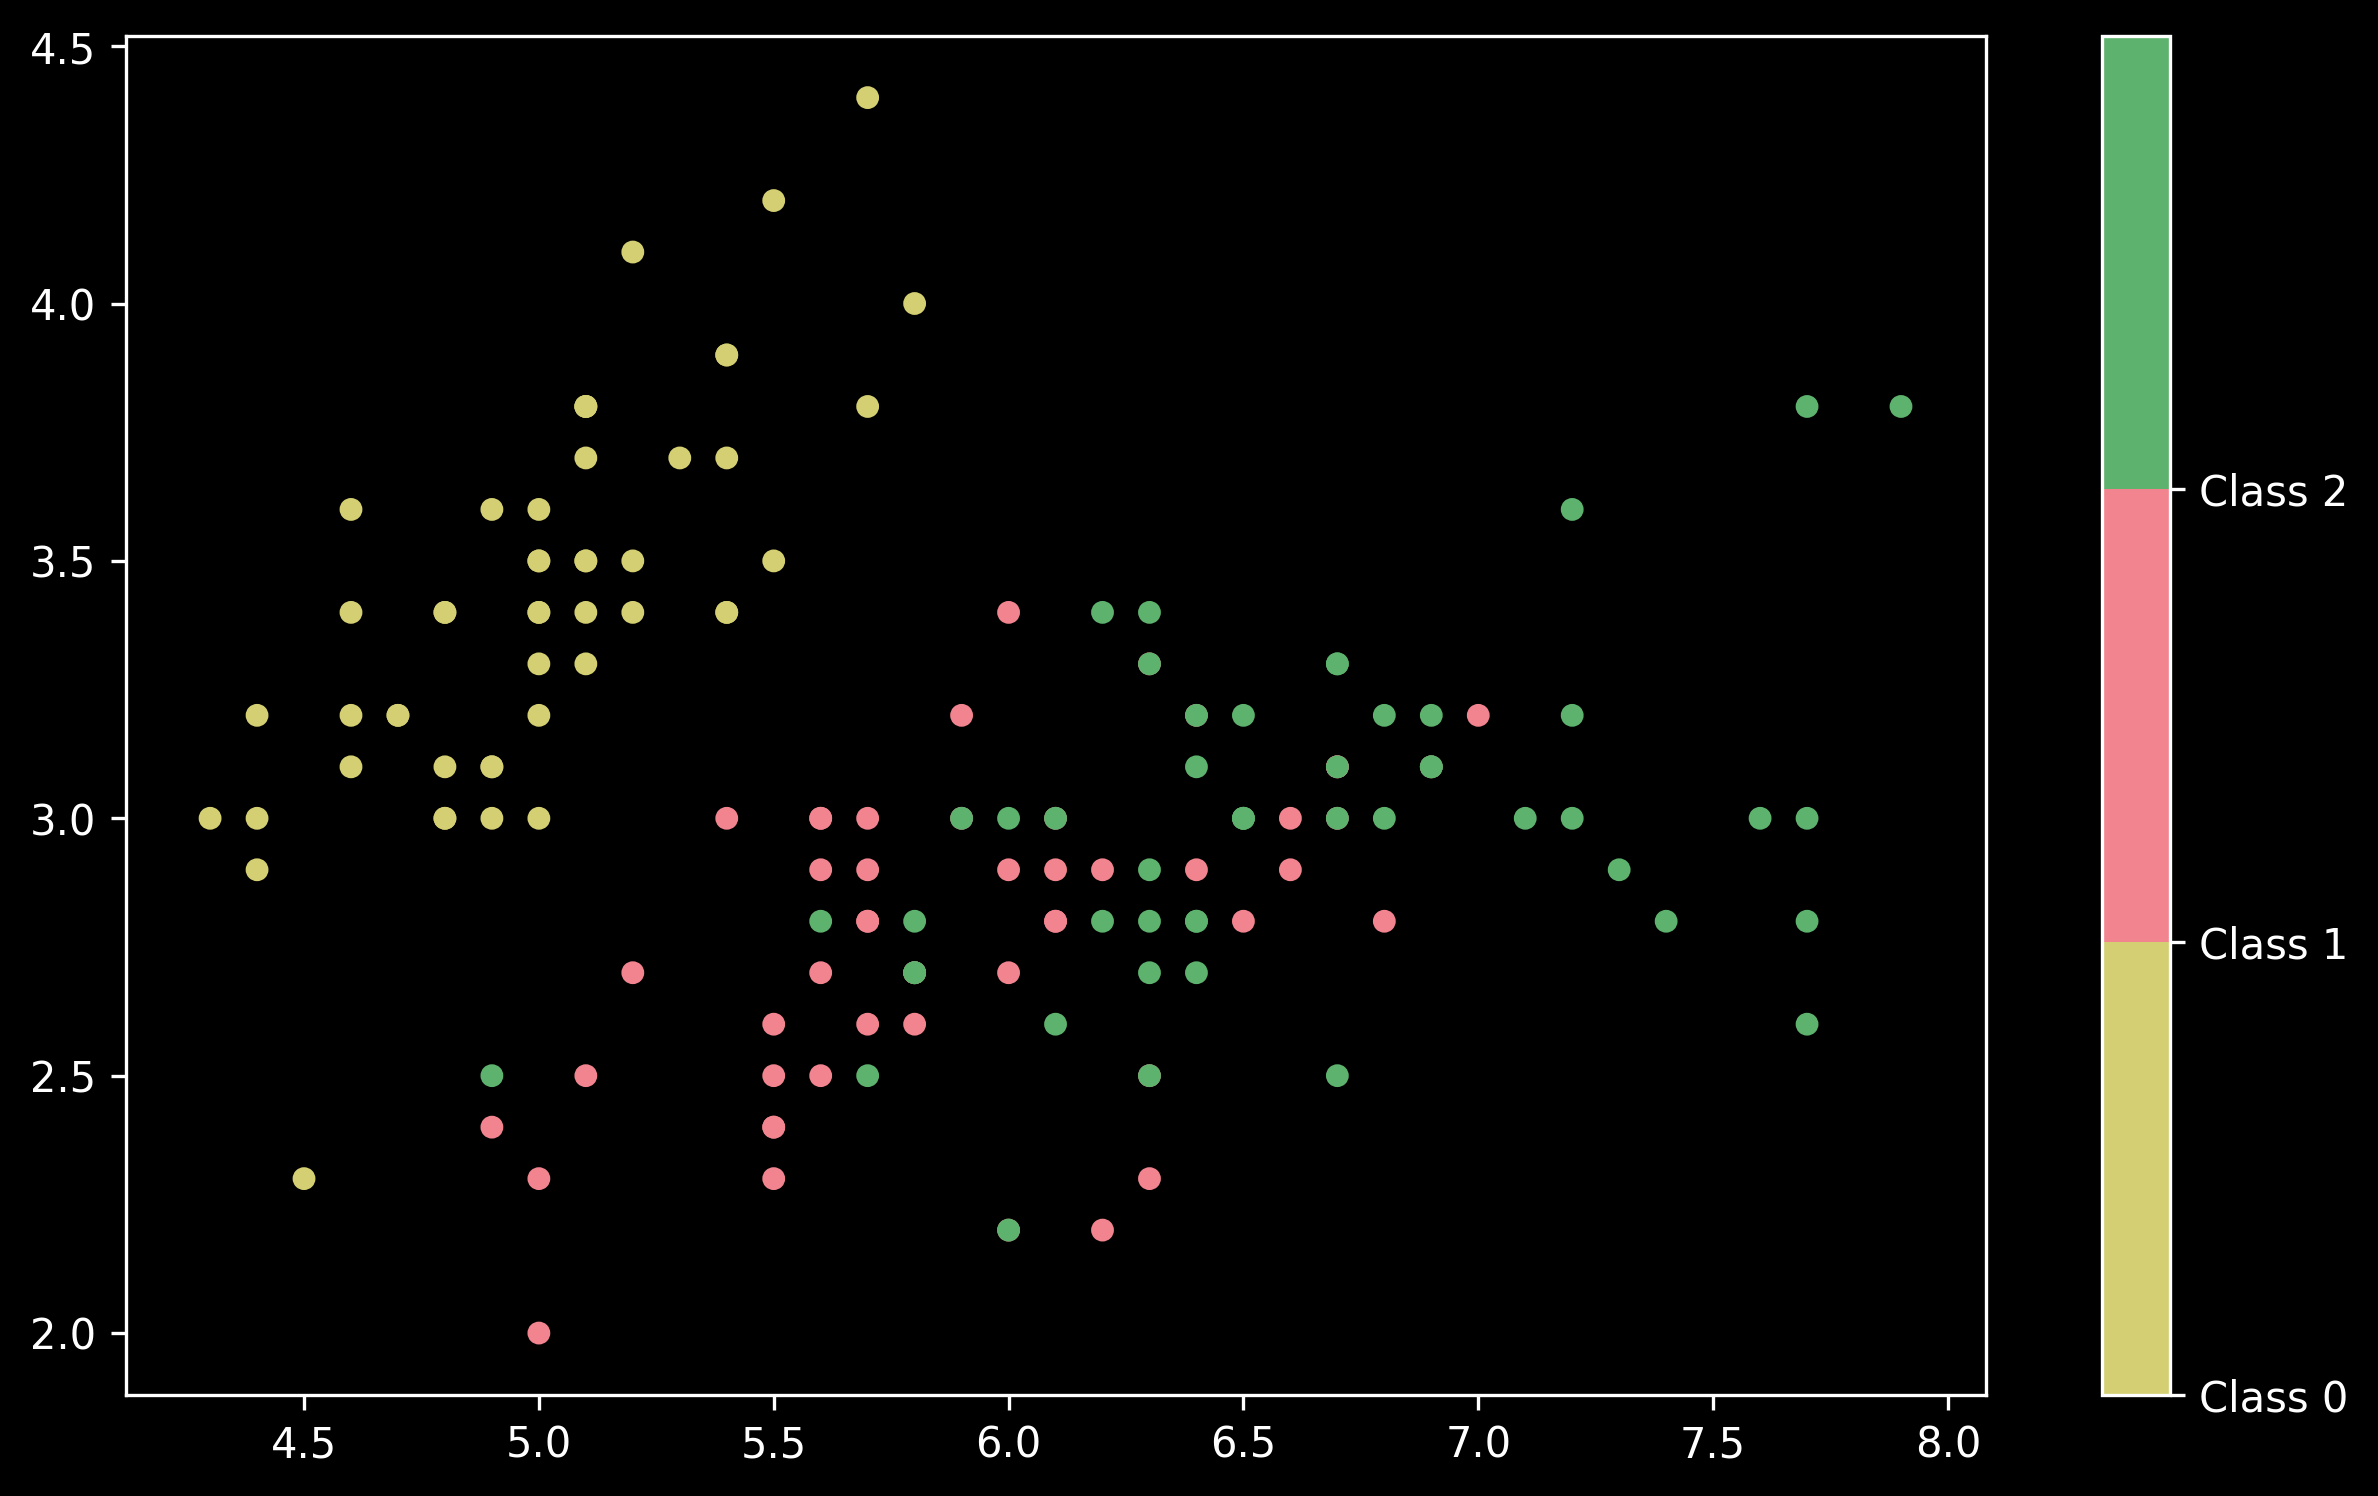

In [7]:
color_l = ['#D4CF72', '#F2848F', '#5DB26D']

plt.figure(figsize=(10, 6), dpi=300)
plt.scatter(X[:,0], X[:,1], c=y, s=20,
                            cmap=colors.ListedColormap(color_l))

cb = plt.colorbar()
loc = np.arange(0, max(y), max(y)/len(color_l))
cb.set_ticks(loc)
cb.set_ticklabels(['Class 0', 'Class 1', 'Class 2'])

In [8]:
clf = KNN()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test, k=3)

print(f'Accuracy: {round((np.sum(y_pred == y_test) / len(y_test))*100, 2)}%')

Accuracy: 86.67%


### Accuracy for different k's

In [9]:
accs = {}

for k in range(1, X.shape[0]):
    y_pred = clf.predict(X_test, k=k)
    accs[k] = round((np.sum(y_pred == y_test) / y_test.size), 2)*100

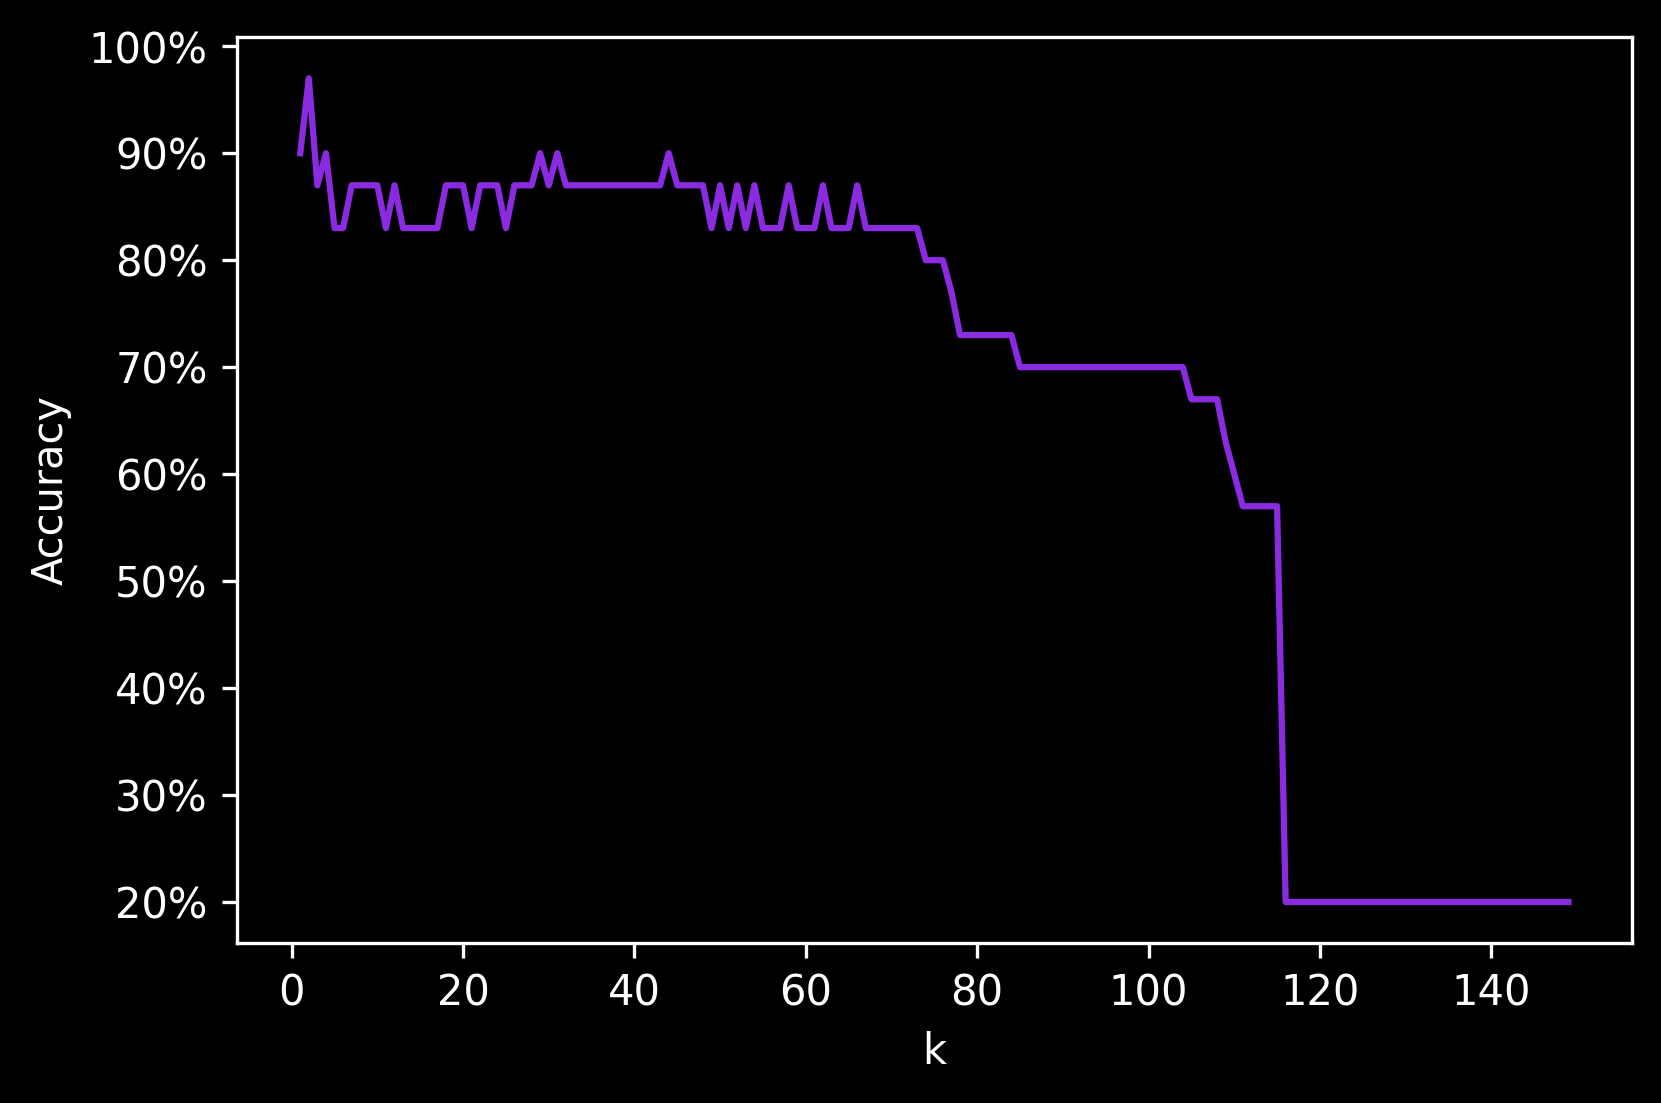

In [10]:
plt.rcParams['figure.dpi'] = 300
plt.plot(list(accs.keys()), list(accs.values()), c='blueviolet')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.yticks(ticks=np.arange(20, 101, 10), 
           labels=[f'{x}%' for x in np.arange(20, 101, 10)]);